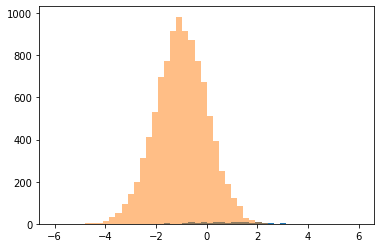

In [2]:
import numpy as np
import matplotlib.pyplot as plt

foo = np.random.normal(loc=1, size=100) # a normal distribution
bar = np.random.normal(loc=-1, size=10000) # a normal distribution

_, bins, _ = plt.hist(foo, bins=50, range=[-6, 6] )
_ = plt.hist(bar, bins=bins, alpha=0.5)

In [3]:
import sys
sys.path.append('../')
from pycore.tikzeng import *

# defined your arch
arch = [
    to_head( '..' ),
    to_cor(),
    to_begin(),
    to_Conv("conv1", 512, 64, offset="(0,0,0)", to="(0,0,0)", height=64, depth=64, width=2 ),
    to_Pool("pool1", offset="(0,0,0)", to="(conv1-east)"),
    to_Conv("conv2", 128, 64, offset="(1,0,0)", to="(pool1-east)", height=32, depth=32, width=2 ),
    to_connection( "pool1", "conv2"),
    to_Pool("pool2", offset="(0,0,0)", to="(conv2-east)", height=28, depth=28, width=1),
    to_SoftMax("soft1", 10 ,"(3,0,0)", "(pool1-east)", caption="SOFT"  ),
    to_connection("pool2", "soft1"),
    to_end()
    ]

def main():
    namefile = str(sys.argv[0]).split('.')[0]
    to_generate(arch, namefile + '.tex' )

if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'pycore'

In [8]:
import visualkeras
import tensorflow as tf
# model = ...
model = tf.keras.models.load_model("./models/alexNetv6_logits.hdf5", custom_objects={})

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

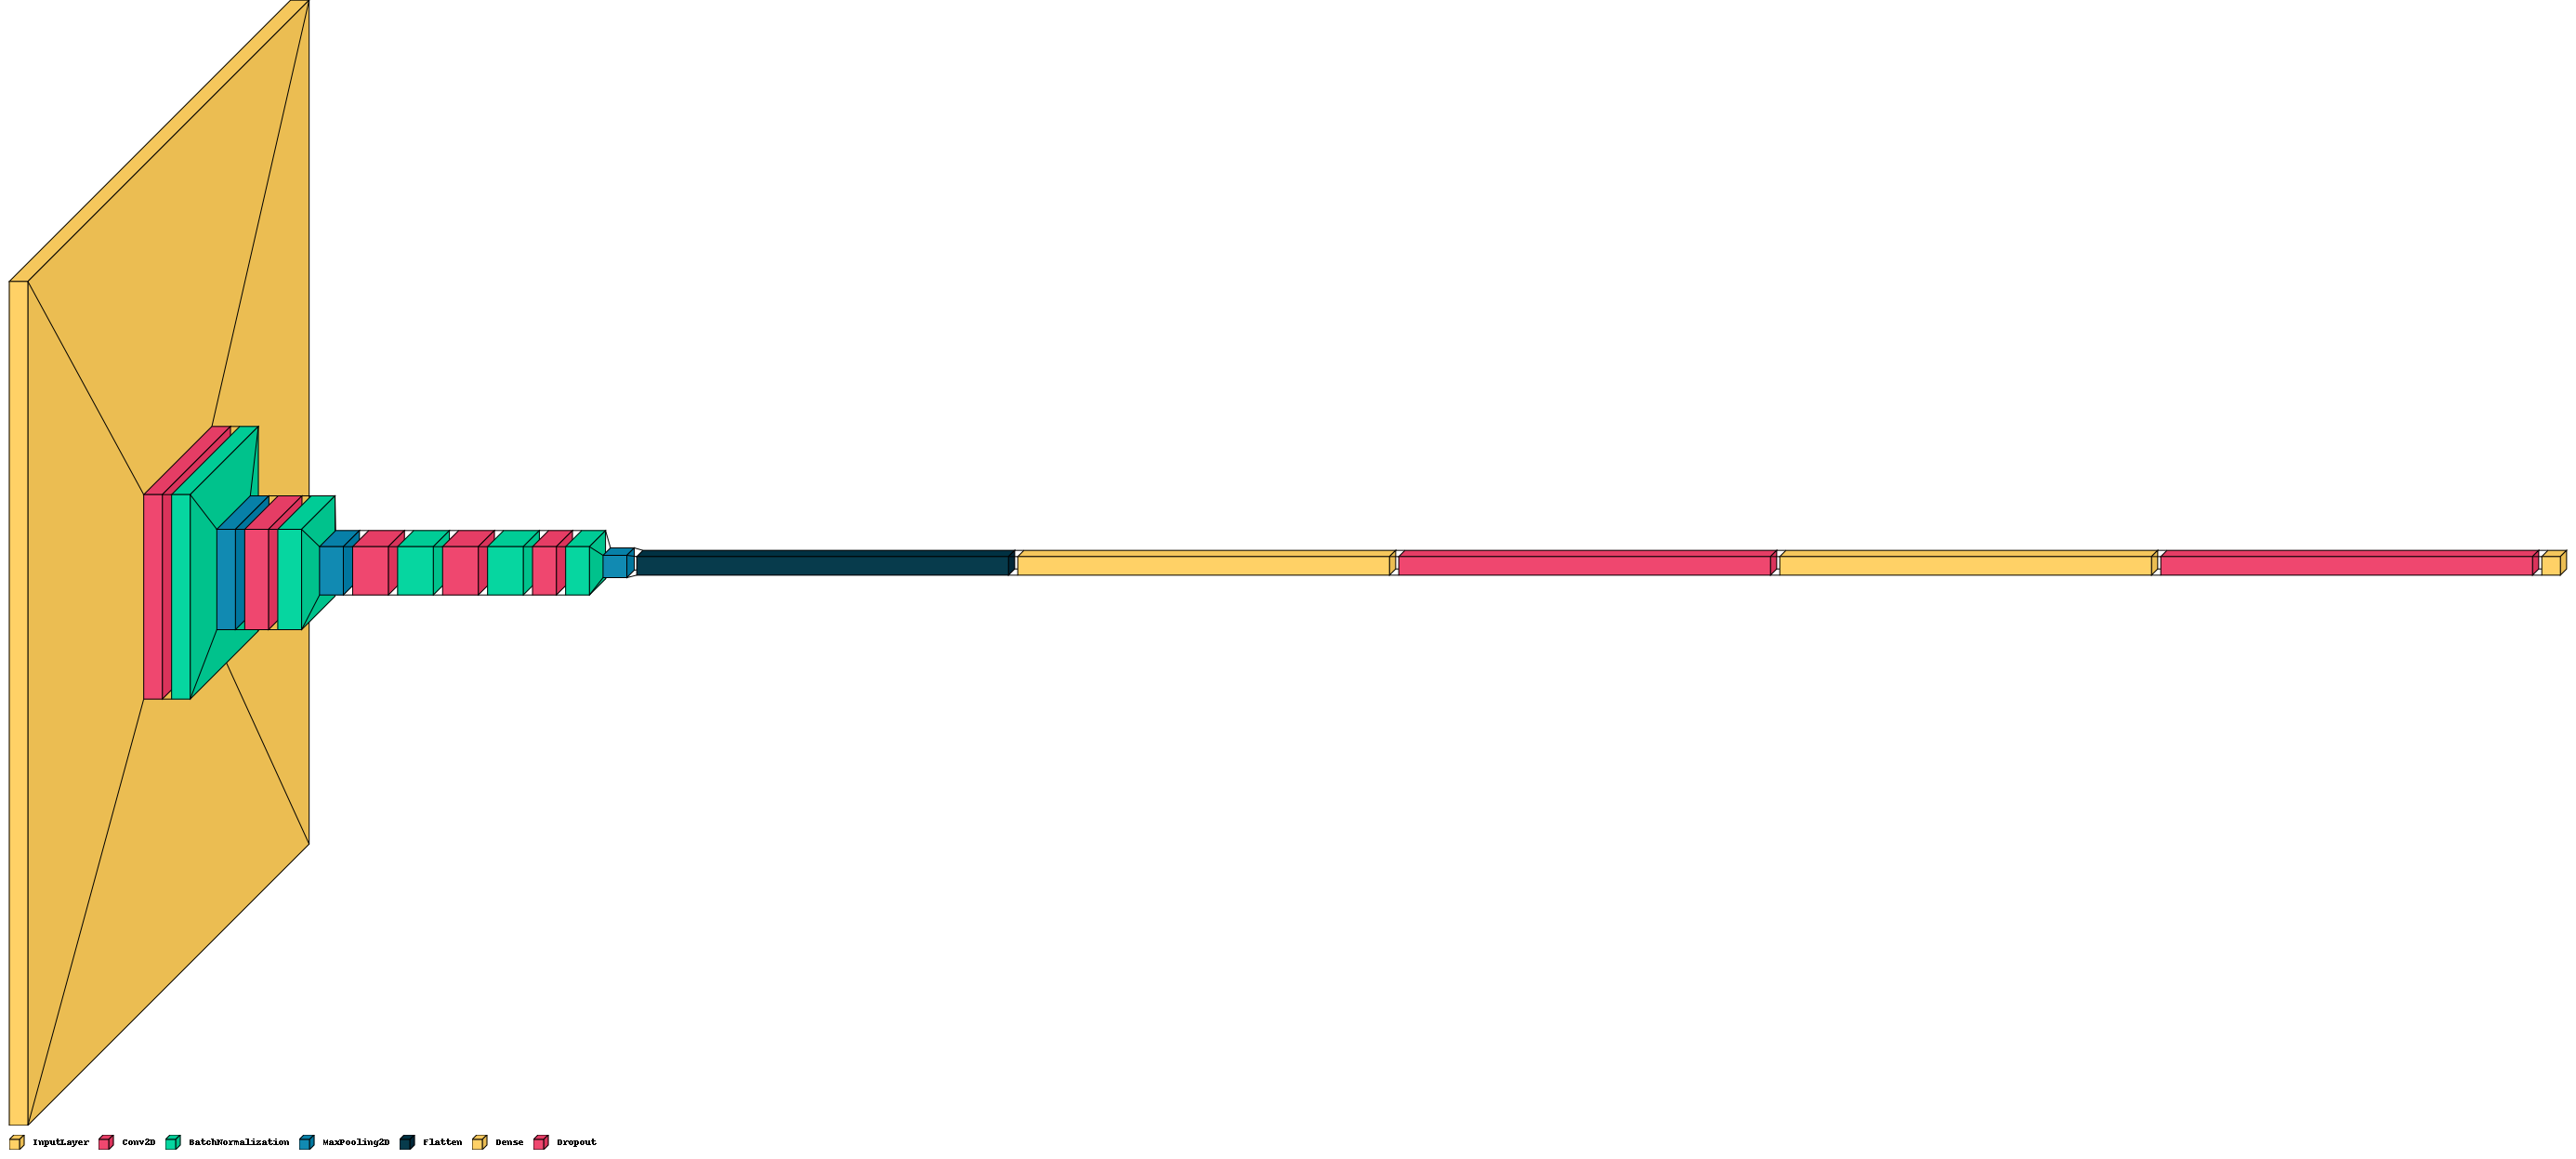

In [9]:
visualkeras.layered_view(model,legend=True,)